# IST 736 - Text Analytics

## Final Project

#### Cartney Thompson

In [1]:
import pandas as pd
pd.set_option('display.width', None)
pd.options.display.max_colwidth = 5000
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Using seaborn for visualization
import warnings
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

## Data Import 

In [2]:
df_before = pd.read_json('tweetsNikeBefore.json')
df_after = pd.read_json('tweetsNikeAfter.json')

In [3]:
#Shape of DataFrames
print(df_before.shape)
print(df_after.shape)

(22964, 10)
(268716, 10)


In [4]:
# Randomly sample 10% of your dataframe
#df_after = df_after.sample(frac=0.1,random_state=1)

In [5]:
df_after.shape

(268716, 10)

## Data Cleanup

In [6]:
#Remove Unnecessary columns
df_before.drop(['fullname', 'html', 'url', 'likes', 'replies', 'retweets'], axis=1, inplace=True)
df_after.drop(['fullname', 'html', 'url', 'likes', 'replies', 'retweets'], axis=1, inplace=True)

In [7]:
#Check for Nan - Before
df_before.isna().sum()

id           0
text         0
timestamp    0
user         0
dtype: int64

In [8]:
#Check for Nan - After
df_after.isna().sum()

id           0
text         0
timestamp    0
user         0
dtype: int64

Next, we are going to clean up the tweets.

In [9]:
#Create a function that cleans up text
import string
import re
def text_cleanup_no_hashtags(txt):
    punctuations = '''!()-[]{};:"\,<>./ー?$%^&*_~'''
    #Remove pic URLs
    txt = re.sub(r"pic.twitter\S+", "", txt)
    #Remove URLs
    txt = re.sub(r"http\S+", "http", txt)
    #Remove hastags
    txt = re.sub("#[\w:]*", "", txt)
    #Remove @user
    txt = re.sub("@[\w:]*", "", txt)
    #Remove RT for retweets
    txt = txt.replace("RT", "")
    #Remove punctuations for retweets (except ' and #)
    txt = re.sub(r"[^\w\d'\s]+","",txt) 
    #remove /n
    txt = txt.replace("\n", "")
    #Make all lowercase
    txt = txt.lower()
    return txt

In [10]:
#Create a function that cleans up text
def text_cleanup(txt):
    punctuations = '''!()-[]{};:"\,<>./ー?$%^&*_~'''
    #Remove hastags
    #txt = re.sub("#[\w:]*", "", txt)
    #Remove pic URLs
    txt = re.sub(r"pic.twitter\S+", "", txt)
    #Remove URLs
    txt = re.sub(r"http\S+", "", txt)
    #Remove @user
    txt = re.sub("@[\w:]*", "", txt)
    #Remove RT for retweets
    txt = txt.replace("RT", "")
    #Remove punctuations for retweets (except ' and #)
    txt = re.sub(r"[^\w\d'\s]+","",txt) 
    #remove /n
    txt = txt.replace("\n", "")
    #Make all lowercase
    txt = txt.lower()
    return txt

In [11]:
def text_cleanup_no_urls(txt):
    punctuations = '''!()-[]{};:"\,<>./ー?$%^&*_~'''
    #Remove pic URLs
    txt = re.sub(r"pic.twitter\S+", "", txt)
    #Remove URLs
    txt = re.sub(r"http\S+", "http", txt)
    #remove /n
    txt = txt.replace("\n", "")
    return txt

In [12]:
#Text Cleanup
df_before['modified_text'] = df_before['text'].apply(lambda x: text_cleanup(x))
df_after['modified_text'] = df_after['text'].apply(lambda x: text_cleanup(x))

Next, we will create a column to help remove bot tweets

In [13]:
#Text Cleanup
df_before['modified_text_bots'] = df_before['text'].apply(lambda x: text_cleanup_no_hashtags(x))
df_after['modified_text_bots'] = df_after['text'].apply(lambda x: text_cleanup_no_hashtags(x))

In [14]:
#Export files to csv
#df_before['text'].to_csv ('df_before_final.csv', index = False, header=True, sep='\t')
#df_after['text'].to_csv ('df_after_final.csv', index = False, header=True, sep='\t')

In [15]:
df_after.shape

(268716, 6)

Next just remove URLs

In [16]:
#Text Cleanup
df_before['text_output'] = df_before['text'].apply(lambda x: text_cleanup_no_urls(x))
df_after['text_output'] = df_after['text'].apply(lambda x: text_cleanup_no_urls(x))

In [17]:
#Remove duplicate tweets - Could potentially be bot tweets
df_before.drop_duplicates(subset = ['modified_text_bots'], inplace = True, keep=False)
df_after.drop_duplicates(subset = ['modified_text_bots'], inplace = True, keep=False)

In [18]:
df_before.shape

(19480, 7)

In [19]:
df_before.head()

,id,text,timestamp,user,modified_text,modified_text_bots,text_output
0,1033141863191064576,"Show them better. Shoot for your dreams .think big. You are your motivation.\n#justdoit #livelovelaugh #success @ College Park, Georgia https://www.instagram.com/p/Bm4YQ2rF-XS/?utm_source=ig_twitter_share&igshid=18xlmayqqrn7g …",2018-08-24 23:59:49,ATTI_STARR,show them better shoot for your dreams think big you are your motivationjustdoit livelovelaugh success college park georgia,show them better shoot for your dreams think big you are your motivation college park georgia http,"Show them better. Shoot for your dreams .think big. You are your motivation.#justdoit #livelovelaugh #success @ College Park, Georgia http …"
1,1033141725148143616,You don't always need credentials. You just need to do it! #intuition #musicians #writers #justdoit pic.twitter.com/GNn5Kd6Jj3,2018-08-24 23:59:16,QntanaTrilogy,you don't always need credentials you just need to do it intuition musicians writers justdoit,you don't always need credentials you just need to do it,You don't always need credentials. You just need to do it! #intuition #musicians #writers #justdoit
2,1033141628997791744,Lmao i thought you supported Adidas? Why switch to Nike? @adidasUS @Nike,2018-08-24 23:58:53,zahinsays,lmao i thought you supported adidas why switch to nike,lmao i thought you supported adidas why switch to nike,Lmao i thought you supported Adidas? Why switch to Nike? @adidasUS @Nike
5,1033141186167533568,@TDeezy85 Catching Flights in the @nike x @kingjames x @johnelliottco Icon! #sayitwityakickz #sneakerbardetroit #solecollector #nikebasketball #nike #johnelliott #kickgamecray… https://www.instagram.com/p/Bm4XjAFFT7E/?utm_source=ig_twitter_share&igshid=vp8yie1ckpny …,2018-08-24 23:57:08,SayItWitYaKickz,catching flights in the x x icon sayitwityakickz sneakerbardetroit solecollector nikebasketball nike johnelliott kickgamecray,catching flights in the x x icon http,@TDeezy85 Catching Flights in the @nike x @kingjames x @johnelliottco Icon! #sayitwityakickz #sneakerbardetroit #solecollector #nikebasketball #nike #johnelliott #kickgamecray… http …
6,1033141099047608320,I should get sponsored by Nike cause I’m all about that check @Nike pic.twitter.com/GnrIXVZhxC,2018-08-24 23:56:47,FvmousLiyah,i should get sponsored by nike cause im all about that check,i should get sponsored by nike cause im all about that check,I should get sponsored by Nike cause I’m all about that check @Nike


In [20]:
# Randomly sample 10% of your dataframe
df_before_rs = df_before.sample(n=100,random_state=99)
df_after_rs = df_after.sample(n=100,random_state=99)

#Export sample of tweets to csv
df_before_rs['text_output'].to_csv ('df_before_rs.csv', index = False, header=True, sep='\t')
df_after_rs['text_output'].to_csv ('df_after_rs.csv', index = False, header=True, sep='\t')

In [21]:
#Load in sentiment for training model
df_before_rs['sentiment'] = pd.read_csv('df_before_rs_complete.csv', header=None).set_index(df_before_rs.index)
df_after_rs['sentiment'] = pd.read_csv('df_after_rs_complete.csv', header=None).set_index(df_after_rs.index)

In [22]:
df_before_rs.shape

(100, 8)

In [23]:
df_before_rs.head()

,id,text,timestamp,user,modified_text,modified_text_bots,text_output,sentiment
10351,1032168512511459328,#endofsummer SALE right here right now \nmany sneakers reduced now \n\nNike W Air Max 98 White/White-Reflect Silver\n\na v a i l a b l e http://bit.ly/1XsW72t \n#sale #sales #jordan #adidas #nike #vans #puma #asics #reebok #kicks #sneakers #conversepic.twitter.com/wC1lzKywQL,2018-08-22 07:32:04,titoloshop,endofsummer sale right here right now many sneakers reduced now nike w air max 98 whitewhitereflect silvera v a i l a b l e sale sales jordan adidas nike vans puma asics reebok kicks sneakers converse,sale right here right now many sneakers reduced now nike w air max 98 whitewhitereflect silvera v a i l a b l e http,#endofsummer SALE right here right now many sneakers reduced now Nike W Air Max 98 White/White-Reflect Silvera v a i l a b l e http #sale #sales #jordan #adidas #nike #vans #puma #asics #reebok #kicks #sneakers #converse,neutral
8950,1032307859189575680,The whole amount of the trainers?,2018-08-22 16:45:47,Parky_teaches,the whole amount of the trainers,the whole amount of the trainers,The whole amount of the trainers?,neutral
1157,1033010711071522816,Nike Kid's Air Max 9 Leather Big Kids (GS) Shoe on Play Market https://play.google.com/store/apps/details?id=com.topshop … #NIKE #Basketballpic.twitter.com/bAwRzD8CpE,2018-08-24 15:18:40,BagTipCom,nike kid's air max 9 leather big kids gs shoe on play market nike basketball,nike kid's air max 9 leather big kids gs shoe on play market http,Nike Kid's Air Max 9 Leather Big Kids (GS) Shoe on Play Market http … #NIKE #Basketball,neutral
16494,1033398718148628480,". Nike, thank you for supporting her.",2018-08-25 17:00:28,FantaAutoma,nike thank you for supporting her,nike thank you for supporting her,". Nike, thank you for supporting her.",positive
17526,1033332940325961728,"Wow, Bernard Giudicelli and the French Federation are racist AF! Does it really surprise us though...?!? #justdoit #wesupportyouserenahttps://twitter.com/Nike/status/1033211014899060737 …",2018-08-25 12:39:06,EvMeek24,wow bernard giudicelli and the french federation are racist af does it really surprise us though justdoit wesupportyouserena,wow bernard giudicelli and the french federation are racist af does it really surprise us though,"Wow, Bernard Giudicelli and the French Federation are racist AF! Does it really surprise us though...?!? #justdoit #wesupportyouserenahttp …",positive


In [24]:
#We will use TweetTokenizer from NLTK toolkit for word tokenization. We will make all words lowercase.
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer(strip_handles=False, preserve_case=False, reduce_len=True)
df_before['tokenized_text'] = df_before['modified_text'].apply(tt.tokenize)
df_after['tokenized_text'] = df_after['modified_text'].apply(tt.tokenize)

## Model Building - Sentiment

In [25]:
#We will use TweetTokenizer from NLTK toolkit for word tokenization. We will make all words lowercase.
df_before_rs['tokenized_text'] = df_before_rs['modified_text'].apply(tt.tokenize)
df_after_rs['tokenized_text'] = df_after_rs['modified_text'].apply(tt.tokenize)

In [26]:
#Create x and y values for each model
#Sentiment for Before
y_before=df_before_rs['sentiment'].values
X_before=df_before_rs['modified_text'].values

#Sentiment for After
y_after=df_after_rs['sentiment'].values
X_after=df_after_rs['modified_text'].values

First we will start with Naive Bayes

##### Naive Bayes

In [27]:
#Vectorization and Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

nb_clf_pipe = Pipeline([('vect', TfidfVectorizer(encoding='latin-1', use_idf=True, binary=True, min_df=5, max_df=0.4, lowercase=True)),('nb', MultinomialNB())])

#Using 10-fold Cross Validation - Before
scores = cross_val_score(nb_clf_pipe, X_before, y_before, cv=10)
avg = float('{0:.2f}'.format(sum(scores)/len(scores)))
print("The average accuracy score for MNB Tfidf weightingis: ",  avg)

The average accuracy score for MNB Tfidf weightingis:  0.62


In [28]:
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True, ngram_range=(1,3), min_df=5, max_df=0.4, lowercase=True)),('nb', MultinomialNB())])

#Using 10-fold Cross Validation - Before
scores = cross_val_score(nb_clf_pipe, X_before, y_before, cv=10)
avg = float('{0:.2f}'.format(sum(scores)/len(scores)))
print("The average accuracy score for MNB Bag of Words: ",  avg)

The average accuracy score for MNB Bag of Words:  0.58


##### SVM

In [29]:
from sklearn.svm import LinearSVC
svm_clf_pipe = Pipeline([('vect', TfidfVectorizer(encoding='latin-1', ngram_range=(1,2), use_idf=True, binary=False, lowercase=True)),('svm', LinearSVC(C=0.2))])
#Using 10-fold Cross Validation - Before
scores = cross_val_score(svm_clf_pipe, X_before, y_before, cv=10)
avg = float('{0:.2f}'.format(sum(scores)/len(scores)))
print("The average accuracy score for SVM Tfidf weighting is: ",  avg)

The average accuracy score for SVM Tfidf weighting is:  0.62


In [30]:
svm_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True, ngram_range=(1,2), lowercase=True)),('svm', LinearSVC(C=0.2))])
#Using 10-fold Cross Validation - Before
scores = cross_val_score(svm_clf_pipe, X_before, y_before, cv=10)
avg = float('{0:.2f}'.format(sum(scores)/len(scores)))
print("The average accuracy score for SVM Bag of Words is: ",  avg)

The average accuracy score for SVM Bag of Words is:  0.64


## Data Exploration

First, we will explore the before tweets.

### Before Campaign and After Campaign

In [31]:
#Getting list of stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
stop_words.add("i'm")
stop_words.add("'")
stop_words.add("get")
stop_words.add("via")
stop_words.add("us")
stop_words.add("we")
stop_words.add("nike")
stop_words.add("justdoit")

In [32]:
#Remove Stop Words
df_before['tokenized_text'] = df_before['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
df_after['tokenized_text'] = df_after['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
#Add back to modified text 
df_before['modified_text'] = df_before['tokenized_text'].apply(lambda x: ' '.join(x))
df_after['modified_text'] = df_after['tokenized_text'].apply(lambda x: ' '.join(x))

#### Visualize List of Common Words

###### Before

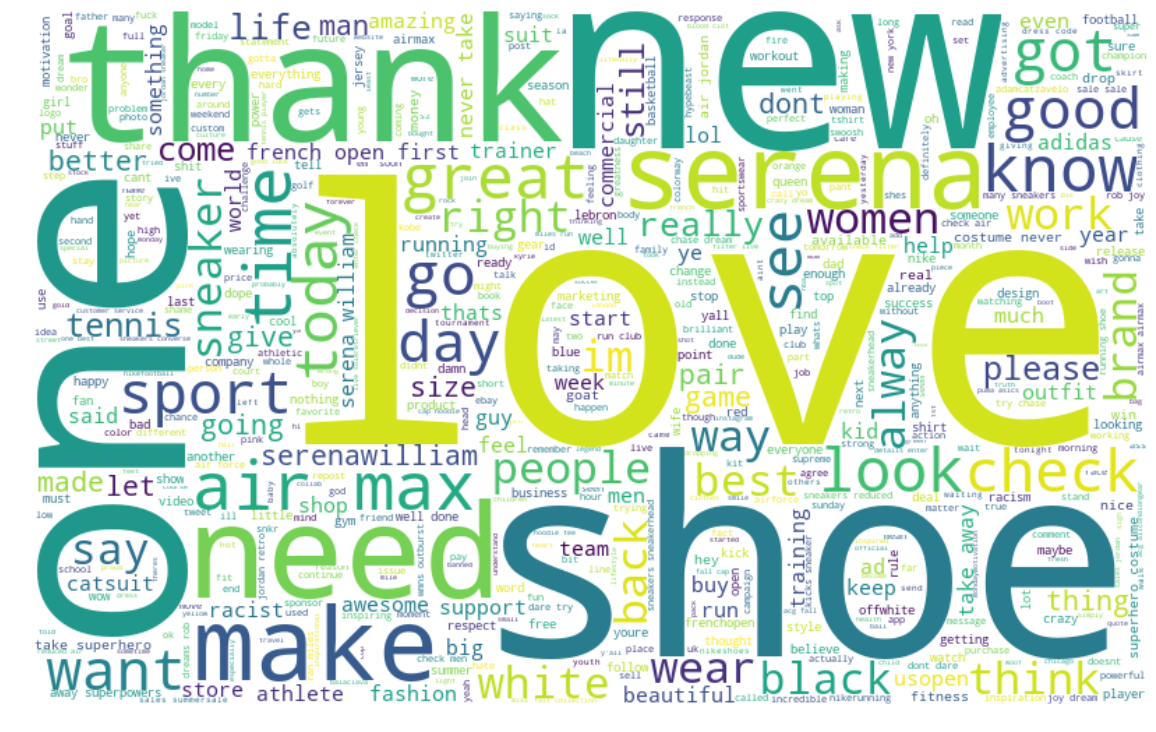

In [33]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,  max_words=1000, collocations = True, background_color='white')
all_words = ' '.join([text for text in df_before['modified_text']])
wordcloud.generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Looking at the word cloud, some of the top words are check, items, share, etc. Let's look a count of most common words.

###### After

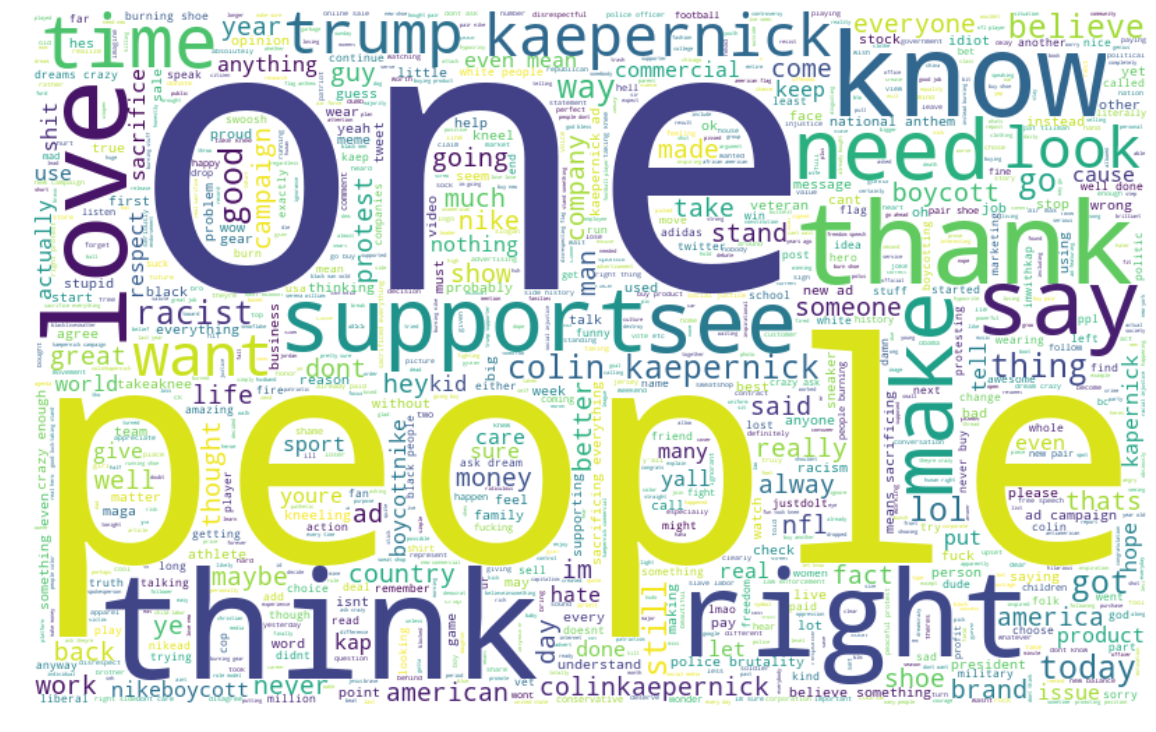

In [34]:
wordcloud = WordCloud(width=800, height=500,  max_words=1000, collocations = True, background_color='white')
all_words = ' '.join([text for text in df_after['modified_text']])
wordcloud.generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Common Words Count

In [35]:
import itertools
import collections

all_words = list(itertools.chain(*df_before['tokenized_text']))
counts = collections.Counter(all_words)
counts.most_common(25)

[('air', 1019),
 ('new', 958),
 ('like', 943),
 ('love', 912),
 ('shoes', 743),
 ('check', 741),
 ('one', 735),
 ('serena', 719),
 ('sneakers', 706),
 ('jordan', 617),
 ('take', 603),
 ('size', 587),
 ('black', 547),
 ('max', 521),
 ('great', 515),
 ('time', 514),
 ('make', 491),
 ('good', 484),
 ('go', 479),
 ('never', 473),
 ('dont', 465),
 ('know', 459),
 ('tennis', 454),
 ('need', 449),
 ('white', 448)]

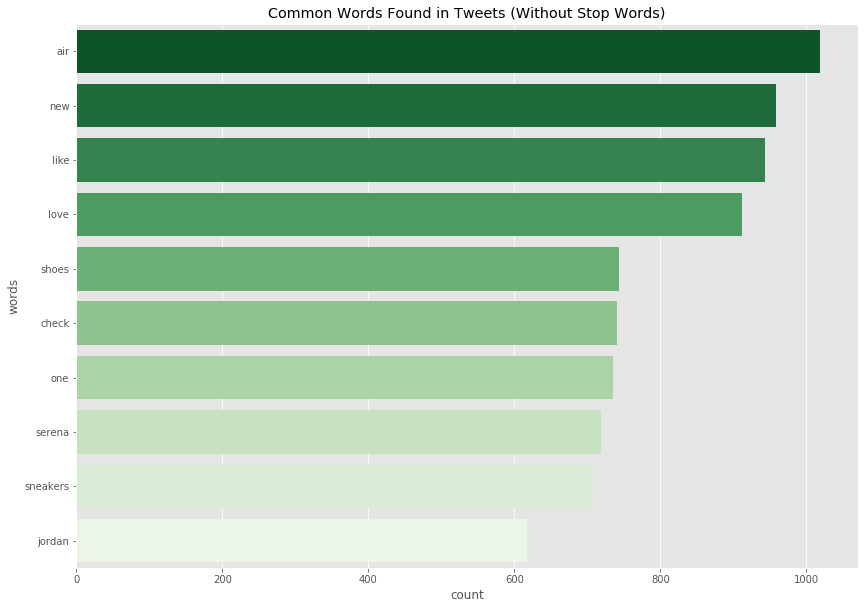

In [36]:
wordCounts = pd.DataFrame(counts.most_common(10), columns=['words', 'count'])
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="count", y="words", data=wordCounts, palette="Greens_r")
plt.title('Common Words Found in Tweets (Without Stop Words)')
plt.show()

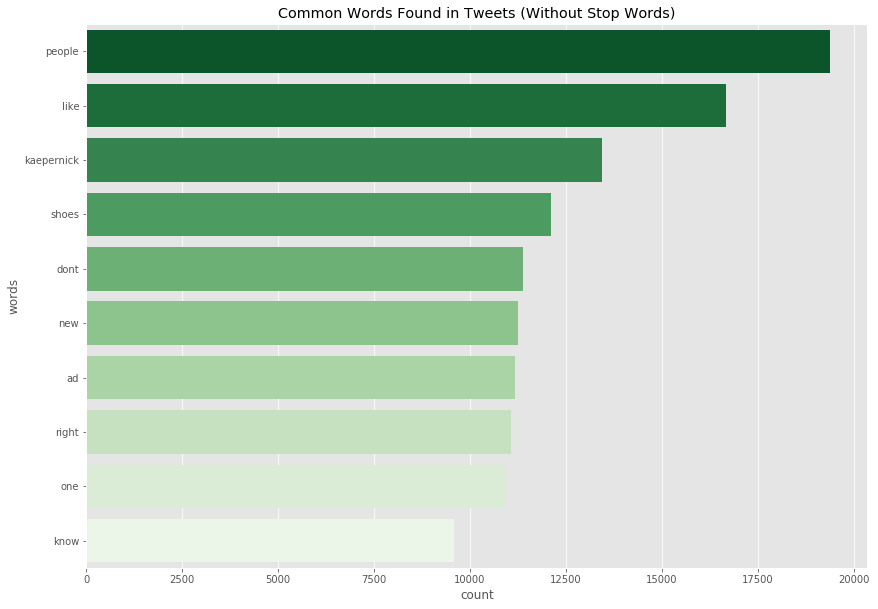

In [37]:
all_words = list(itertools.chain(*df_after['tokenized_text']))
counts = collections.Counter(all_words)
counts.most_common(25)

wordCounts = pd.DataFrame(counts.most_common(10), columns=['words', 'count'])
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="count", y="words", data=wordCounts, palette="Greens_r")
plt.title('Common Words Found in Tweets (Without Stop Words)')
plt.show()

A lot of words we cannot make out individually, so let's look at n-grams

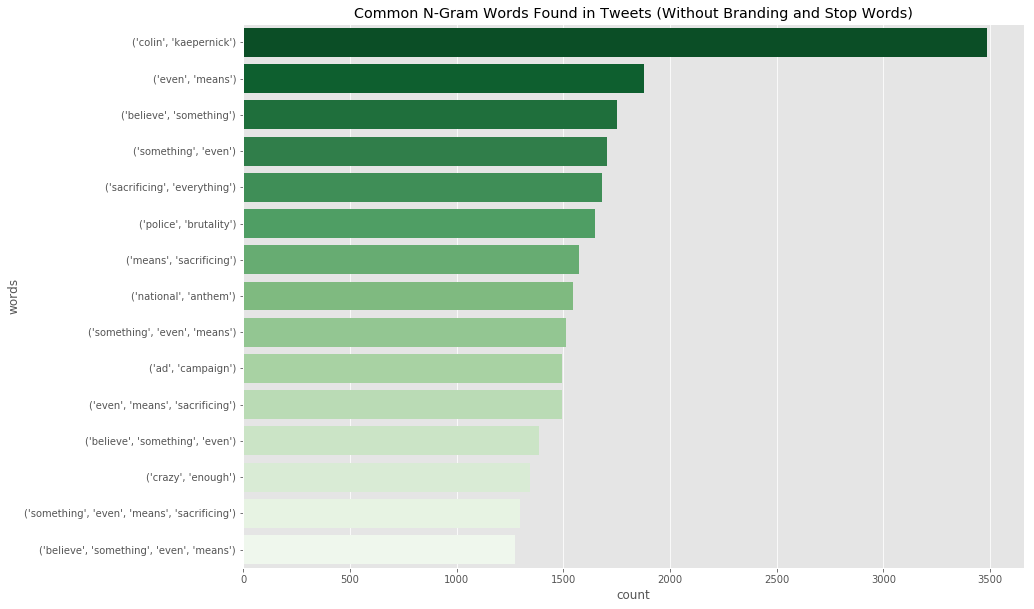

In [38]:
from nltk.util import everygrams
# Create list of lists containing bigrams in tweets
terms_ngram = [list(everygrams(tweet, min_len=2, max_len=5)) for tweet in df_after['tokenized_text']]

# Flatten list of bigrams in clean tweets
ngrams = list(itertools.chain(*terms_ngram))

# Create counter of words in clean bigrams
ngram_counts = collections.Counter(ngrams)

nGramwordCounts = pd.DataFrame(ngram_counts.most_common(15), columns=['words', 'count'])
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="count", y="words", data=nGramwordCounts, palette="Greens_r")
plt.title('Common N-Gram Words Found in Tweets (Without Branding and Stop Words)')
plt.show()

In [39]:
matching = [s for s in ngrams if "one" in s]

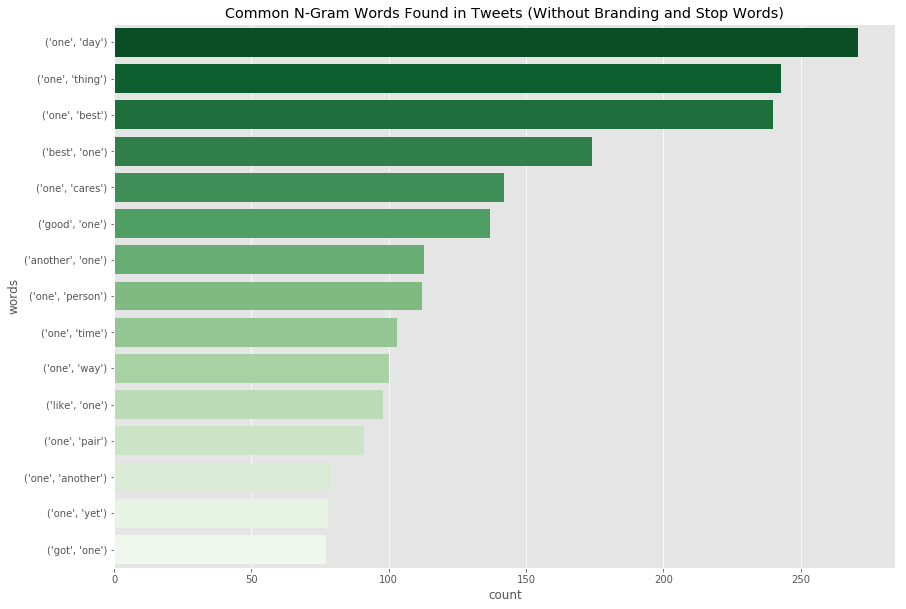

In [40]:
# Create counter of words in clean bigrams
ngram_counts = collections.Counter(matching)

nGramwordCounts = pd.DataFrame(ngram_counts.most_common(15), columns=['words', 'count'])
fig=plt.figure(figsize=(14, 10))
sns.barplot(x="count", y="words", data=nGramwordCounts, palette="Greens_r")
plt.title('Common N-Gram Words Found in Tweets (Without Branding and Stop Words)')
plt.show()

### Sentiment

###### Before

In [24]:
#Utilize vader for sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs_score = []
for i, row in df_before.iterrows():
    vs_score.append(analyzer.polarity_scores(row['modified_text'])['compound'])
df_before['vader_sentiment_score'] = vs_score

In [25]:
sentiment_type = []
for i, row in df_before.iterrows():
    if row['vader_sentiment_score']>=0.2:
        sentiment_type.append('Positive')
    elif row['vader_sentiment_score']<=-0.2:
        sentiment_type.append('Negative')      
    else:
        sentiment_type.append('Neutral')
df_before['vader_sentiment_type'] = sentiment_type

###### After

In [26]:
#Utilize vader for sentiment
analyzer = SentimentIntensityAnalyzer()
vs_score = []
for i, row in df_after.iterrows():
    vs_score.append(analyzer.polarity_scores(row['modified_text'])['compound'])
df_after['vader_sentiment_score'] = vs_score

In [27]:
sentiment_type = []
for i, row in df_after.iterrows():
    if row['vader_sentiment_score']>=0.2:
        sentiment_type.append('Positive')
    elif row['vader_sentiment_score']<=-0.2:
        sentiment_type.append('Negative')      
    else:
        sentiment_type.append('Neutral')
df_after['vader_sentiment_type'] = sentiment_type

In [49]:
df_after.tail()

,id,text,timestamp,user,modified_text,tokenized_text,vader_sentiment_score,vader_sentiment_type
124921,1037898091603652608,"The @Kaepernick7 #Nike commercial playing during the #NFL #ATLvsPHI game on #NBC is a was perfect. Despite a league that has shunned him and a fan-base that just wants him to go away, he's been given a platform for something bigger than football. #JustDoIt",2018-09-07 02:59:22,Thom1st,nike commercial playing nfl atlvsphi game nbc perfect despite league shunned fanbase wants go away he's given platform something bigger football justdoit,"[nike, commercial, playing, nfl, atlvsphi, game, nbc, perfect, despite, league, shunned, fanbase, wants, go, away, he's, given, platform, something, bigger, football, justdoit]",0.6705,Positive
261797,1037325593338163200,"That’s where we’re a little different though. \nOn here, with certain people, I just KNOW I’m not gonna get a good civil conversation out of them so go to trolling, because it makes me laugh. \nBut I can quickly find the good ones in the thread to talk it out once I chill out.",2018-09-05 13:04:28,Ellonian23,thats little different though certain people know im gonna good civil conversation go trolling makes laugh quickly find good ones thread talk chill,"[thats, little, different, though, certain, people, know, im, gonna, good, civil, conversation, go, trolling, makes, laugh, quickly, find, good, ones, thread, talk, chill]",0.8817,Positive
15232,1039278356443754496,"He didn’t re eat the vomit, he just posted it on Twitter because it’s all regurgitated bs anyways",2018-09-10 22:24:03,keithgregory16,didnt eat vomit posted twitter regurgitated bs anyways,"[didnt, eat, vomit, posted, twitter, regurgitated, bs, anyways]",0.0000,Neutral
29894,1038974742697365504,"SHAME On You @CityofKenner & Mayor E Ben Zahn\nBanning Nike Purchases from Parks & Rec\n\nPlease contact us with any complaints, notifications & any other info:\n(504) 468-7206\nmayor@kenner.la.us\n(504) 468-7240\nkennermayor@kenner.la.us\n\n#JustDoIt #TakeAKneehttp://s.nola.com/21bQJVC",2018-09-10 02:17:36,Fam4Fun,shame mayor e ben zahn banning nike purchases parks rec please contact complaints notifications info 504 4687206 mayorlaus 504 4687240 kennermayorlaus justdoit takeaknee,"[shame, mayor, e, ben, zahn, banning, nike, purchases, parks, rec, please, contact, complaints, notifications, info, 504 4687206, mayorlaus, 504 4687240, kennermayorlaus, justdoit, takeaknee]",-0.5423,Negative
152185,1037737857870385152,That’s who you wanna market well this liter yo clothes I’m finna spark it...oh you said he earned it these nike sign I’m finna burn it...cut that shit out big fella,2018-09-06 16:22:40,Selfmade_frank,thats wanna market well liter yo clothes im finna spark itoh said earned nike sign im finna burn itcut shit big fella,"[thats, wanna, market, well, liter, yo, clothes, im, finna, spark, itoh, said, earned, nike, sign, im, finna, burn, itcut, shit, big, fella]",-0.1531,Neutral


In [29]:
df_before.groupby(by=['vader_sentiment_type'])['id'].count()

vader_sentiment_type
Negative     2757
Neutral      8826
Positive    11381
Name: id, dtype: int64

In [30]:
df_after.groupby(by=['vader_sentiment_type'])['id'].count()

vader_sentiment_type
Negative     666
Neutral      915
Positive    1106
Name: id, dtype: int64

In [31]:
df_after.shape

(2687, 8)

### Topic Modeling

Next, we are going to find common topics amongst the tweets about nike before the campaign started. First we will vbuild our word vectors.

###### Before

In [87]:
#Vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

dataBefore = df_before['modified_text'].values
vectorizer = CountVectorizer(analyzer='word', min_df=10,  stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}', ngram_range=(1,3), max_features=30)
tf_before = vectorizer.fit_transform(dataBefore)
tf_feature_names_before = vectorizer.get_feature_names()

In [88]:
#Check vector density
# Materialize the sparse data
data_dense = tf_before.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  2.7063655030800824 %


###### After

In [108]:
#Vectorize the data
dataAfter = df_after['modified_text'].values
vectorizer = CountVectorizer(analyzer='word', min_df=10,  stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}', ngram_range=(1,3), max_features=30)
tf_after = vectorizer.fit_transform(dataAfter)
tf_feature_names_after = vectorizer.get_feature_names()

In [44]:
#Check vector density
# Materialize the sparse data
data_dense = tf_after.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  3.7165595199179955 %


Next, we will determine our optimal number of topics via a grid search.

#### Optimal Topics Using Grid Search

###### Before

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
# Define Search Param
search_params = {'n_components': [3,4,5,6,7,8,9,10,11,12,13,14,15]}

search_params = {'n_components': [8]}


# Init the Model
lda = LatentDirichletAllocation(learning_method='online', learning_offset=50)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf_before)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [8]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [90]:
# Best Model
best_lda_model_before = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model_before.perplexity(tf_before))

Best Model's Params:  {'n_components': 8}
Best Log Likelihood Score:  -19487.77624751493
Model Perplexity:  28.739424002958426


So we will utilize 11 topics for modeling

In [80]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

-12975.054 (+/-1061.785) for {'n_components': 8}


In [39]:
#Build LDA Model
# Run LDA
#a = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50,random_state=0)
#lda_output = lda.fit_transform(tf)

### Display Topics

In [91]:
#Display Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [92]:
display_topics(best_lda_model_before, tf_feature_names_before, no_top_words)

Topic 0:
sneakers jordan know white air check shoes black airmax wear
Topic 1:
new time good need running got shoes wear serena run
Topic 2:
air max air max need running wear airmax sneakers white shoes
Topic 3:
check size black running shoes white air new jordan sneakers
Topic 4:
make people airmax white wear need sneakers dont know like
Topic 5:
serena tennis dont run got wear running best know love
Topic 6:
like great day wear need got dont know run time
Topic 7:
love shoes best running serena tennis wear sneakers got new


In [93]:
# Create Document - Topic Matrix
lda_output_before = best_lda_model_before.transform(tf_before)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model_before.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(dataBefore))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_before, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,dominant_topic
Doc0,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc1,0.04,0.04,0.71,0.04,0.04,0.04,0.04,0.04,2
Doc2,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc3,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc4,0.06,0.06,0.06,0.56,0.06,0.06,0.06,0.06,3
Doc5,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc6,0.06,0.06,0.06,0.56,0.06,0.06,0.06,0.06,3
Doc7,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc8,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0
Doc9,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0


In [96]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model_before.components_)

# Assign Column and Index
df_topic_keywords.columns = tf_feature_names_before
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head(10)

,air,air max,airmax,best,black,check,day,dont,good,got,...,run,running,serena,shoes,size,sneakers,tennis,time,wear,white
Topic0,243.612080,0.125036,0.125055,0.125016,0.125056,0.125125,0.125018,0.125029,0.125009,0.125024,...,0.125013,0.125015,0.125018,0.125059,0.125036,636.925440,0.125022,0.125012,0.125044,442.423846
Topic1,0.125024,0.125009,0.125017,0.125030,0.125017,0.125025,0.125030,0.125022,486.843253,0.125041,...,0.125033,0.125047,0.125036,0.125038,0.125016,0.125020,0.125031,528.083685,0.125037,0.125030
Topic2,717.465231,445.931912,247.064935,0.125012,0.125040,0.125044,0.125021,0.125018,0.125010,0.125026,...,0.125054,377.608211,0.125017,0.125054,0.125033,0.125092,0.125014,0.125020,363.308365,0.125074
Topic3,0.125100,0.125025,0.125017,0.125004,534.492495,713.094152,0.125004,0.125011,0.125007,0.125028,...,0.125026,0.125179,0.125016,0.125133,567.268566,0.125039,0.125026,0.125007,0.125036,0.125124
Topic4,0.125005,0.125003,152.577946,0.125029,0.125038,0.125003,0.125028,0.125058,0.125030,0.125033,...,0.125024,0.125011,0.125027,0.125032,0.125008,0.125059,0.125030,0.125041,0.125069,0.125072
Topic5,0.125013,0.125003,0.125006,0.125048,0.125027,0.125010,0.125026,468.670694,0.125036,400.256047,...,424.631407,0.125098,863.396118,0.125019,0.125006,0.125010,487.866644,0.125035,0.125100,0.125030
Topic6,0.125012,0.125002,0.125008,0.125021,0.125015,0.125005,391.049176,0.125042,0.125030,0.125043,...,0.125039,0.125037,0.125031,0.125024,0.125006,0.125010,0.125032,0.125039,0.125250,0.125022
Topic7,0.125029,0.125007,0.125020,485.099129,0.125012,0.125017,0.125017,0.125031,0.125020,0.125038,...,0.125018,0.125060,0.125048,720.360986,0.125018,0.125038,0.125047,0.125032,0.125038,0.125029


In [98]:
df_topic_keywords.to_csv('df_topic_keywords.csv', index = True, header=True, sep='\t')

In [99]:
#Final Summarization
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,11206
1,5,1393
2,1,1390
3,7,1317
4,6,1277
5,2,1172
6,3,1000
7,4,725


###### After

In [110]:
# Define Search Param
search_params = {'n_components': [3,4,5,6,7,8,9,10,11,12,13,14,15]}

search_params = {'n_components': [5]}


# Init the Model
lda = LatentDirichletAllocation(learning_method='online', learning_offset=50)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf_after)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [111]:
# Best Model
best_lda_model_after = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model_after.perplexity(tf_after))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood Score:  -298720.5727048501
Model Perplexity:  32.87545988650332


In [112]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

-298720.573 (+/-36994.385) for {'n_components': 5}


In [113]:
no_top_words = 10
display_topics(best_lda_model_after, tf_feature_names_after, no_top_words)

Topic 0:
people dont right buy black trump protest want think money
Topic 1:
like kaepernick going really people buy think dont money campaign
Topic 2:
shoes think make good campaign time way money buy new
Topic 3:
know nfl believe need great dont want stand kaepernick protest
Topic 4:
new love support colin want money protest stand kaepernick campaign


In [118]:
# Create Document - Topic Matrix
lda_output_after = best_lda_model_after.transform(tf_after)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model_after.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(dataAfter))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_after, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.1,0.1,0.6,0.1,0.1,2
Doc1,0.2,0.2,0.2,0.2,0.2,0
Doc2,0.2,0.2,0.2,0.2,0.2,0
Doc3,0.1,0.1,0.1,0.1,0.6,4
Doc4,0.2,0.2,0.2,0.2,0.2,0
Doc5,0.1,0.6,0.1,0.1,0.1,1
Doc6,0.2,0.2,0.2,0.2,0.2,0
Doc7,0.2,0.2,0.2,0.2,0.2,0
Doc8,0.6,0.1,0.1,0.1,0.1,0
Doc9,0.2,0.2,0.2,0.2,0.2,0


In [119]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model_after.components_)

# Assign Column and Index
df_topic_keywords.columns = tf_feature_names_after
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head(10)

,believe,black,buy,campaign,colin,dont,going,good,great,kaepernick,...,really,right,shoes,stand,support,think,time,trump,want,way
Topic0,0.200904,6364.480805,9240.285321,0.201048,0.201112,12104.401902,0.201301,0.201237,0.200714,0.201447,...,0.201192,11413.134869,0.201765,0.201878,0.202074,0.202252,0.201508,5830.006051,0.202741,0.201816
Topic1,0.200800,0.201140,0.201855,0.201721,0.201339,0.201768,6770.753808,0.201384,0.200752,8486.713714,...,6290.361812,0.201314,0.201389,0.201108,0.201155,0.201778,0.201283,0.201716,0.201597,0.201461
Topic2,0.200702,0.201085,0.202309,7025.059958,0.201120,0.201768,0.201185,8607.227501,0.201057,0.201612,...,0.201264,0.201490,13011.525461,0.201355,0.201485,9065.357633,6816.509644,0.201142,0.201841,6028.226799
Topic3,6575.112083,0.201070,0.201237,0.201353,0.201347,0.202204,0.201013,0.201295,5966.441798,0.201896,...,0.201080,0.201646,0.201255,0.201899,0.201401,0.201559,0.201327,0.201491,0.201978,0.201329
Topic4,0.201027,0.201231,0.201986,0.202997,6925.468645,0.201626,0.200902,0.201157,0.200872,5622.704556,...,0.200881,0.202214,0.201765,6393.556135,8209.644520,0.201277,0.201344,0.201407,6730.937091,0.201511


In [120]:
df_topic_keywords.to_csv('df_topic_keywords_after.csv', index = True, header=True, sep='\t')

In [121]:
#Final Summarization
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,152789
1,2,29729
2,4,27005
3,1,22781
4,3,15487


In [116]:
range(best_lda_model_before.n_components)

range(0, 8)

In [117]:
range(best_lda_model_after.n_components)

range(0, 5)